# Dr. Semmelweis and the Discovery of Handwashing

**Project Description**

In 1847, the Hungarian physician Ignaz Semmelweis makes a breakthough discovery: He discovers handwashing. Contaminated hands was a major cause of childbed fever and by enforcing handwashing at his hospital he saved hundreds of lives.
In this python project we will reanalyze the medical data Semmelweis collected. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
yearly=pd.read_csv('datasets/yearly_deaths_by_clinic.csv')

In [3]:
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [4]:
yearly.loc[yearly['clinic'] == 'clinic 1', 'clinic'] = 1
yearly.loc[yearly['clinic'] == 'clinic 2', 'clinic'] = 2

In [5]:
yearly

,year,births,deaths,clinic
0,1841,3036,237,1
1,1842,3287,518,1
2,1843,3060,274,1
3,1844,3157,260,1
4,1845,3492,241,1
5,1846,4010,459,1
6,1841,2442,86,2
7,1842,2659,202,2
8,1843,2739,164,2
9,1844,2956,68,2


In [6]:
# Calculate the proportion of deaths
yearly['proportion_deaths'] = yearly['deaths'] / yearly['births']

# Extract rows from clinic 1 into yearly1
yearly1 =yearly[yearly['clinic'] == 1]

# Extract rows from clinic 2 into yearly2
yearly2 = yearly[yearly['clinic'] == 2]

In [7]:
yearly1

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,1,0.078063
1,1842,3287,518,1,0.157591
2,1843,3060,274,1,0.089542
3,1844,3157,260,1,0.082357
4,1845,3492,241,1,0.069015
5,1846,4010,459,1,0.114464


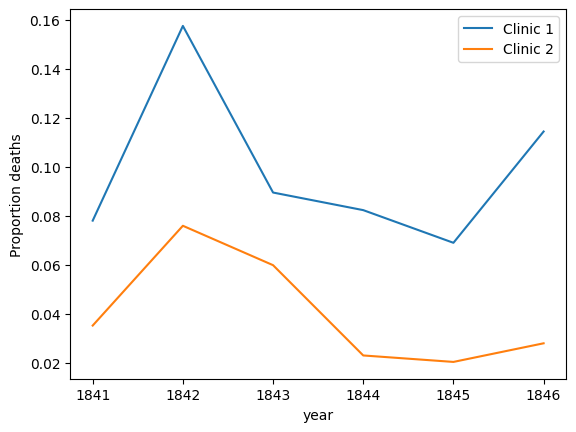

In [8]:
import matplotlib.pyplot as plt

# Plotting the data
ax = yearly1.plot(x='year', y='proportion_deaths', label='Clinic 1')
yearly2.plot(x='year', y='proportion_deaths', label='Clinic 2', ax=ax)

# Customize the plot
ax.set_ylabel("Proportion deaths")

# Display the plot
plt.show()

In [9]:
my_df = pd.read_csv(
    "datasets/monthly_deaths.csv", 
    parse_dates=["date"])

In [10]:
monthly['proportion_deaths'] = monthly['deaths'] / monthly['births']

NameError: name 'monthly' is not defined

In [ ]:
monthly.tail()

In [ ]:
monthly.head(5)

In [ ]:
# Plotting the data
ax = monthly.plot(y='proportion_deaths', label='Clinic 1')

# Customize the plot
ax.set_ylabel("Proportion deaths")

# Display the plot
plt.show()

In [ ]:

handwashing_start = pd.to_datetime("1847-01-01")  

# Splitting the data into before and after handwashing periods
before_washing = monthly[monthly.index < handwashing_start]
after_washing = monthly[monthly.index >= handwashing_start]

# Plotting the data
ax = before_washing.plot(y='proportion_deaths', label='Before Handwashing')
after_washing.plot(y='proportion_deaths', label='After Handwashing', ax=ax)

# Customize the plot
ax.set_ylabel("Proportion deaths")

# Display the plot
plt.show()


In [ ]:
# Select the 'proportion_deaths' column from before_washing and after_washing
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']

# Calculate the difference in mean monthly proportion of deaths
reduction_mean = after_proportion.mean() - before_proportion.mean()

# Print the average reduction
print("Average reduction in proportion of deaths due to handwashing: ", reduction_mean)

In [ ]:
np.random.seed(42)

# Number of bootstrap iterations
n_bootstrap = 3000

# Initialize the list to store bootstrapped differences in means
boot_mean_diff = []

# Perform bootstrap analysis
for _ in range(n_bootstrap):
    # Sample with replacement from before_proportion and after_proportion
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    
    # Calculate the difference in means
    mean_diff = boot_after.mean() - boot_before.mean()
    
    # Append the difference to boot_mean_diff
    boot_mean_diff.append(mean_diff)

# Calculate the 95% confidence interval
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])

In [ ]:
confidence_interval

True. Based on the data collected by Semmelweis, it is evident that doctors should wash their hands.